In [6]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:40px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

In [7]:
from tensorflow.keras.utils import to_categorical # 분류분석시 완핫인코딩
import pandas as pd # 원핫인코딩
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 딥러닝 : 데이터의 규칙성을 추출
- 응용분야 : 글씨인식, 문장분류, 예측, 질병진단, 얼굴인식
- ML/DL의 종류
    * 지도학습(독립=입력변수, 타겟=종속변수)
        * 분류분석(타겟변수가 category 변수. 다중분류 vs 이진분류) vs 회귀분석
    * 비지도학습(입력변수)
        * 군집화
    * 강화학습
- 지독학습에서의 딥러닝 프로그래밍 방식
    - 1. 데이터 확보 및 생성
    - 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋
    - 3. 모델구성
    - 4. 모델 학습 과정 설정
    - 5. 모델 학습시키기(훈련, 검증데이터셋)
    - 6. 모델 평가(시험데이터셋)
    - 7. 모델 저장/사용(입력값을 주어지면 예측값을 받기)

# 1. 데이터 셋 생성

# 2. 데이터 전처리

In [8]:
# 학습데이터 = 훈련데이터셋
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터

x_val = np.array([1,2,3,4, 5, 6, 7, 8, 9])
y_val = np.array([2,4,6,8,10,12,14,16,18])

In [11]:
# 인코딩 종류 (라벨인코딩, 원핫인코딩)
data = np.array(['a','b','c','b','b'])
print('원 데이터 :', data)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('원핫인코딩된 데이터 :\n', one_hot_encoding_data)

원 데이터 : ['a' 'b' 'c' 'b' 'b']
라벨인코딩된 데이터 : [0 1 2 1 1]
원핫인코딩된 데이터 :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [12]:
# 원핫인코딩(분류분석을 위한 target변수)
data = np.array([1, 4, 5, 4, 5])
categorical_onehot = to_categorical(data) # 원핫인코딩 결과가 numpy 배열
print('to_categorical 이용 \n', categorical_onehot)
getdummies_onehot = pd.get_dummies(data) # 원핫인코딩 결과가 DataFrame
print('get_dummies 이용\n', getdummies_onehot)
print(type(categorical_onehot), type(getdummies_onehot))

to_categorical 이용 
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
get_dummies 이용
        1      4      5
0   True  False  False
1  False   True  False
2  False  False   True
3  False   True  False
4  False  False   True
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [ ]:

getdummies_onehot

In [ ]:
# 분류분석을 위한 target변수 원핫인코딩
Y_train = to_categorical(y_train, 19)
Y_val   = to_categorical(y_val)

In [ ]:
x_train.shape, Y_train.shape, x_val.shape, Y_val.shape

# 3. 모델구성

In [7]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(38, activation='sigmoid')) # 활성화 함수:relu, elu, tanh, sigmoid
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(19, activation='softmax')) 
model.summary()







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정
- 회귀분석에서의 loss : mse, rmse, mae
- 분류분석에서의 loss : categorical_crossentropy


In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 5. 모델 학습시키기


In [9]:
hist = model.fit(x_train, Y_train, epochs=300, batch_size=10,
                validation_data=(x_val, Y_val), verbose=2)
# verbose=0:출력없음 / 1:기본값출력 / 2:에포크별 자세한 로그 출력

Epoch 1/300
9/9 - 1s - loss: 2.7518 - accuracy: 0.0222 - val_loss: 2.6001 - val_accuracy: 0.0000e+00 - 515ms/epoch - 57ms/step
Epoch 2/300
9/9 - 0s - loss: 2.5406 - accuracy: 0.0889 - val_loss: 2.4437 - val_accuracy: 0.1111 - 35ms/epoch - 4ms/step
Epoch 3/300
9/9 - 0s - loss: 2.3957 - accuracy: 0.1111 - val_loss: 2.3338 - val_accuracy: 0.1111 - 36ms/epoch - 4ms/step
Epoch 4/300
9/9 - 0s - loss: 2.3118 - accuracy: 0.0556 - val_loss: 2.2582 - val_accuracy: 0.1111 - 31ms/epoch - 3ms/step
Epoch 5/300
9/9 - 0s - loss: 2.2406 - accuracy: 0.1889 - val_loss: 2.1942 - val_accuracy: 0.2222 - 31ms/epoch - 3ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1793 - accuracy: 0.2111 - val_loss: 2.1438 - val_accuracy: 0.1111 - 35ms/epoch - 4ms/step
Epoch 7/300
9/9 - 0s - loss: 2.1379 - accuracy: 0.2000 - val_loss: 2.0998 - val_accuracy: 0.3333 - 33ms/epoch - 4ms/step
Epoch 8/300
9/9 - 0s - loss: 2.0898 - accuracy: 0.2444 - val_loss: 2.0552 - val_accuracy: 0.2222 - 32ms/epoch - 4ms/step
Epoch 9/300
9/9 - 0s - los

Epoch 69/300
9/9 - 0s - loss: 0.4406 - accuracy: 1.0000 - val_loss: 0.4134 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 70/300
9/9 - 0s - loss: 0.4258 - accuracy: 1.0000 - val_loss: 0.4019 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 71/300
9/9 - 0s - loss: 0.3998 - accuracy: 1.0000 - val_loss: 0.3841 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 72/300
9/9 - 0s - loss: 0.3873 - accuracy: 1.0000 - val_loss: 0.3706 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3819 - accuracy: 1.0000 - val_loss: 0.3600 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3593 - accuracy: 1.0000 - val_loss: 0.3466 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 75/300
9/9 - 0s - loss: 0.3501 - accuracy: 1.0000 - val_loss: 0.3370 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 76/300
9/9 - 0s - loss: 0.3444 - accuracy: 1.0000 - val_loss: 0.3274 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0463 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0447 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0441 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0424 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0412 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0400 - accuracy: 1.0000 - val_loss: 0.0390 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0391 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0379 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 278/300
9/

# 6. 모델 평가하기(모델 학습과정 살펴보고 evaluate)

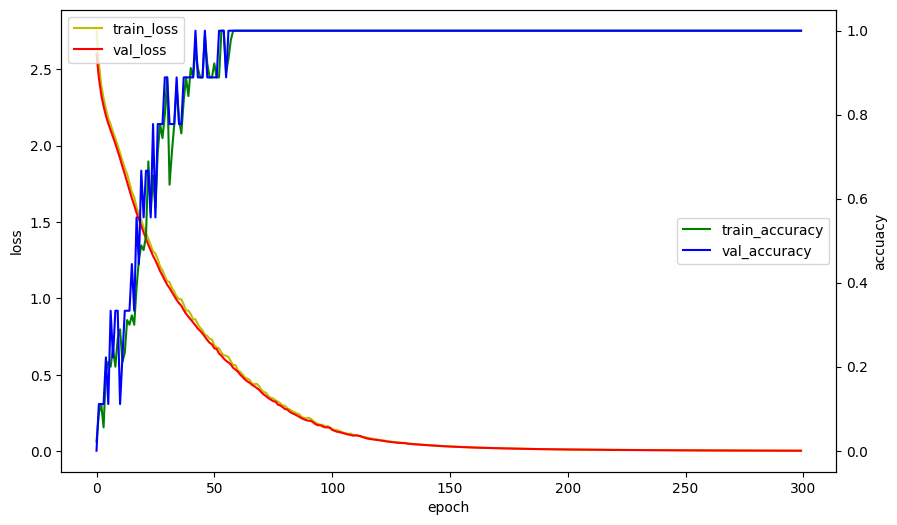

In [19]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'],'y',label='train_loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val_loss')
acc_ax = loss_ax.twinx() # loss_ ax 와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuacy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [24]:

# 모델 평가하기(테스트데이터셋으로 모델 학습 설정과정의 loss, metrics)
score = model.evaluate(x_val, Y_val, batch_size=3)

print('loss :', score[0])
print('accuracy :', score[1])



3/3 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
loss : 0.0029965965077281
accuracy : 1.0


# 7. 모델 사용하기(모델을 이용해서 예측하기)

In [26]:
H = model.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 17ms/step


4

In [28]:
model.predict(np.array([2])).argmax()

1/1 [==============================] - 0s 19ms/step


4

In [ ]:
# 몇%의 확률로 4라고 예측했니?

In [31]:
H[0, H.argmax()] * 100

99.83855485916138

In [32]:
# 2,4,6 의 확률
H[0,[2,4,6]]*100

array([7.7738807e-02, 9.9838554e+01, 8.3710745e-02], dtype=float32)

# 7. 모델 저장

In [33]:
model.save('model/02_deep.h5')

In [34]:
# 저장된 모델 사용하기
model1 = load_model('model/02_deep.h5')






In [35]:
model1.predict(np.array([[3]])).argmax()

1/1 [==============================] - 0s 50ms/step


6